<a href="https://colab.research.google.com/github/BielGMO/bielgmo.github.io/blob/main/DesafioDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ------------------------------------------ DESAFIO ---------------------------------------------

O objetivo deste projeto é encontrar imóveis com oportunidades de bom negócio. Sendo assim, a ideia é encontrar casas que possuem um preço de compra baixo, mas que tem um alto potencial de revenda por um valor mais alto. 



### ----------------------------------------------------- VARIÁVEIS -----------------------------------------------------

#### **longitude**: Medida que representa qual a distância da casa em relação ao oeste. Quanto maior o valor, mais distante do oeste.

#### **latitude**: Medida que representa qual a distância da casa em relação ao norte. Quanto maior o valor, mais distante do norte.

#### **housingMedianAge**: Média de idade de uma construção dentro de um quarteirão; quanto menor o valor, mais nova é a construção.

#### **totalRooms**: Número total de salas no quarteirão.

#### **totalBedrooms**: Número total de quartos no quarteirão.

#### **population**: Número total de pessoas residentes no quarteirão.

#### **households**: Número total de famílias por quarteirão.

#### **medianIncome**: Renda média familiar (Calculado em dezenas de milhares de dólares americanos).

#### **medianHouseValue**: Valor médio da casa por famíla, no quarteirão (Calculado em dólares americanos).

#### **oceanProximity**: Proximidade da casa em relação ao oceano/mar.

## 1 - Importando bibliotecas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

## 2 - Importando dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DesafioDS/housing.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


Temos nesse dataset o *median_house_value*, que é nossa variável a ser prevista, sendo assim um valor dependente dos demais.

O atributo *ocean_proximity* vai ser codificado no modelo de treino, sendo assim lidaremos com ele mais tarde.

Vamos dar uma olhada básica sobre as casas com maior média de valor de venda:

In [ ]:
df[df['median_house_value']==500001.0]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
89,-122.27,37.80,52.0,249.0,78.0,396.0,85.0,1.2434,500001.0,NEAR BAY
459,-122.25,37.87,52.0,609.0,236.0,1349.0,250.0,1.1696,500001.0,NEAR BAY
493,-122.24,37.86,52.0,1668.0,225.0,517.0,214.0,7.8521,500001.0,NEAR BAY
494,-122.24,37.85,52.0,3726.0,474.0,1366.0,496.0,9.3959,500001.0,NEAR BAY
509,-122.23,37.83,52.0,2990.0,379.0,947.0,361.0,7.8772,500001.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20422,-118.90,34.14,35.0,1503.0,263.0,576.0,216.0,5.1457,500001.0,<1H OCEAN
20426,-118.69,34.18,11.0,1177.0,138.0,415.0,119.0,10.0472,500001.0,<1H OCEAN
20427,-118.80,34.19,4.0,15572.0,2222.0,5495.0,2152.0,8.6499,500001.0,<1H OCEAN
20436,-118.69,34.21,10.0,3663.0,409.0,1179.0,371.0,12.5420,500001.0,<1H OCEAN


## 3 - Limpeza de dados

Vamos verificar se nosso dataset possui valores nulos:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Conseguimos ver que *total_bedrooms* possui uma inconsistência. 

Vamos ver com maiores detalhes:

In [ ]:
df[df['total_bedrooms'].isna()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


Existem 207 valores NaN presentes em *total_bedrooms*, vamos substituí-los pela média dessa coluna:

In [ ]:
df['total_bedrooms']=df['total_bedrooms'].fillna(df['total_bedrooms'].dropna().mean())

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Agora conseguimos ver que todos os atributos possuem o mesmo número de linhas.

Em seguida vamos verificar se exitem valores duplicados em nosso dataset:

In [ ]:
df[df.duplicated()==True].count()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

Agora que já verificamos e substituimos valores nulos e também já vimos que não existem valores duplicados, vamos dar uma olhada mais detalhada em nossos dados.

In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Em nenhuma das variáveis apresentadas temos um sinal de anomalia. Sendo assim vamos prosseguir nossa análise.

## 4 - Analisando os dados

Vamos plotar alguns gráficos para melhor compreensão do que temos no dataset.

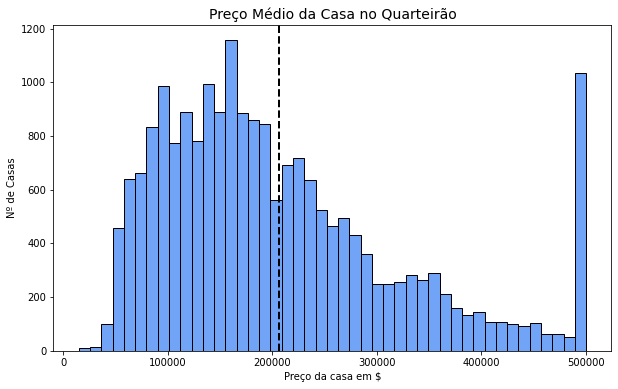

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df.median_house_value, bins = 45, color='#4285f4')
plt.xlabel('Preço da casa em $')
plt.ylabel('Nº de Casas')
plt.title('Preço Médio da Casa no Quarteirão', fontsize=14)
plt.axvline(df['median_house_value'].mean(), color='#010101', linestyle='dashed', linewidth=2, label='Preço Médio da Casa no Quarteirão')
plt.show()

Conseguimos analisar que o preço médio de casas é de U$ 206 mil. Sendo assim, podemos também notar que existem muitas casas de luxo na região.

Vamos dar uma olhada na distribuição das casas pelo estado da California:

In [ ]:
houses = df[['latitude', 'longitude']]

fig = px.scatter_mapbox( houses,
                        lat = 'latitude',
                        lon = 'longitude',
                        color_continuous_scale=px.colors.cyclical.IceFire,
                        zoom=4.5)

fig.update_layout(mapbox_style = 'open-street-map')
fig.update_layout(height=600, margin={'r': 0, 't': 0, 'l': 0, 'b':0})
fig.show()

Agora vamos analisar a distribuição da população na Califórnia:

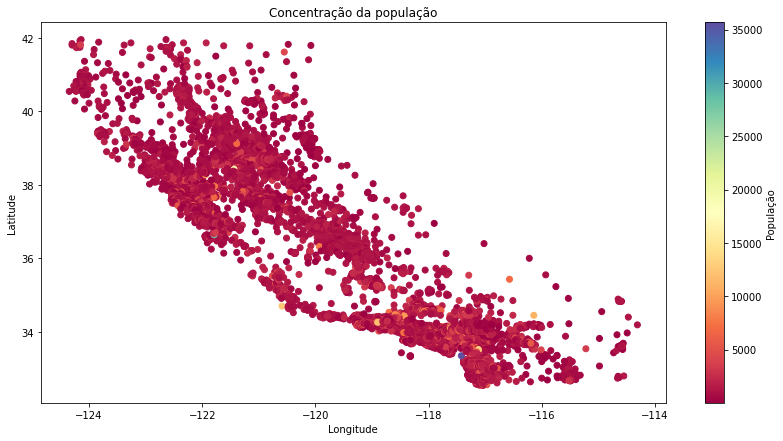

In [ ]:
plt.figure(figsize=(14,7))
plt.scatter(df['longitude'],df['latitude'],c=df['population'], cmap='Spectral')
plt.colorbar().set_label("População")
plt.title('Concentração da população')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

Sendo assim, podemos presumir que grande parte da Califórnia tem regiões com população inferior a 5000 pessoas.

Temos também alguns pontos com 15.000 pessoas e além disso, podemos observar que existe um ponto com até 35.000 pessoas.

Vamos agora dar uma olhada sobre a idade média das construções:

Text(0.5, 1.0, 'Idade Média da Construção')

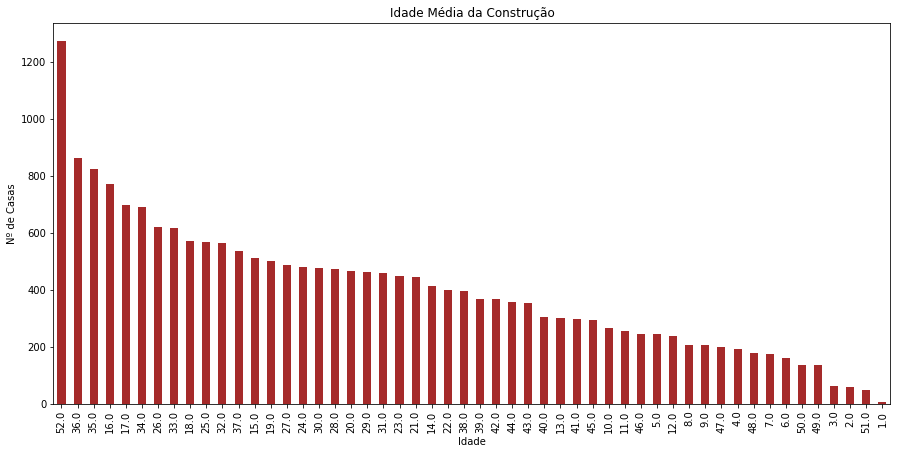

In [ ]:
plt.figure(figsize=(15,7))
df['housing_median_age'].value_counts().plot(kind='bar',color='brown')
plt.xlabel("Idade")
plt.ylabel("Nº de Casas")
plt.title("Idade Média da Construção")

Conseguimos ver que a idade máxima é de 52 anos, sendo essa idade também a mais frequente no dataset.

Analisando agora a próximidade dessas casas com o oceano temos o seguinte resultado:

Text(0.5, 1.0, 'Proximidade com o Oceano')

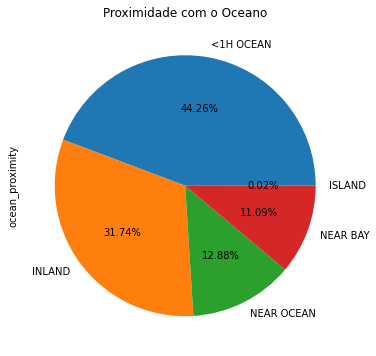

In [ ]:
plt.figure(figsize=(12,6))
df['ocean_proximity'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title('Proximidade com o Oceano')

Isso nos mostra que grande parte das casas está a menos de 1 hora do Oceano, e uma parcela muito pequena se encontra em ilhas próximas da região.

## 5 - Analisando a correlação

Traçando uma correlação temos os seguintes resultados:

Text(0.5, 1.0, 'Correlação Matrix')

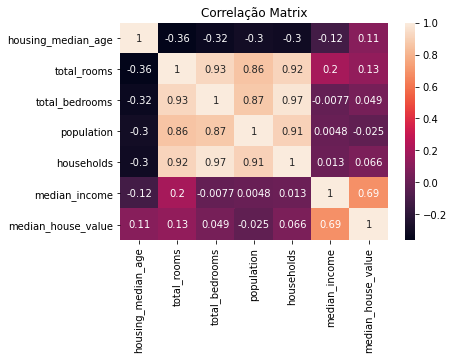

In [ ]:
sns.heatmap(df.iloc[:,2:9].corr(),annot=True)
plt.title("Correlação Matrix")

Com esse quadro conseguimos analisar que a maior correlação existente é entre *households* e *total_bedrooms*.

Já para a nossa variável a ser analisada, a maior correlação é com *median_income*. Vamos dar uma olhada nisso em forma gráfica:

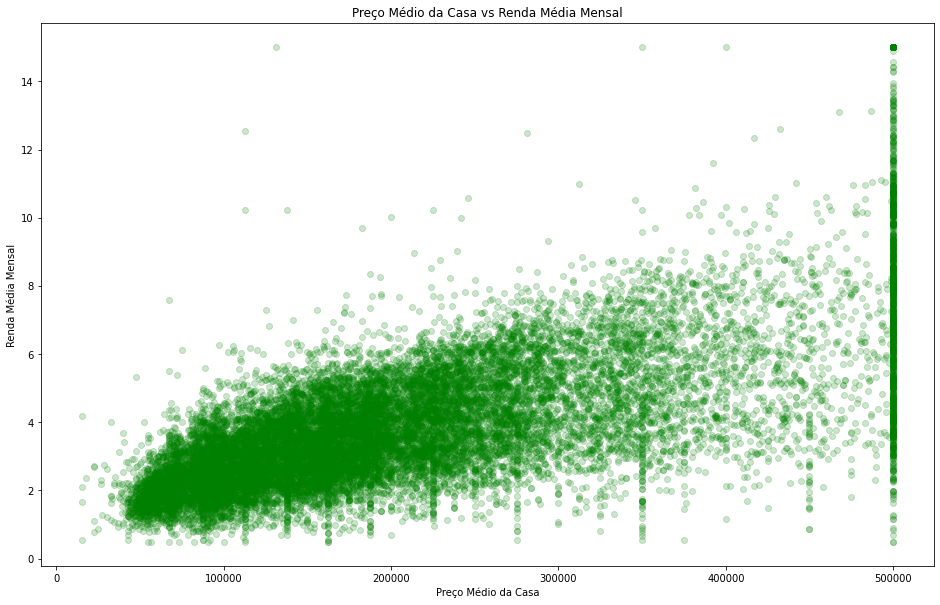

In [ ]:
plt.figure(figsize=(16, 10))
plt.scatter(df['median_house_value'],df['median_income'], alpha=0.2,color='green')
plt.xlabel('Preço Médio da Casa')
plt.ylabel('Renda Média Mensal')
plt.title('Preço Médio da Casa vs Renda Média Mensal')
plt.show()

Vamos analisar se o preço das casas varia de modo linear com algum dos parâmetros:

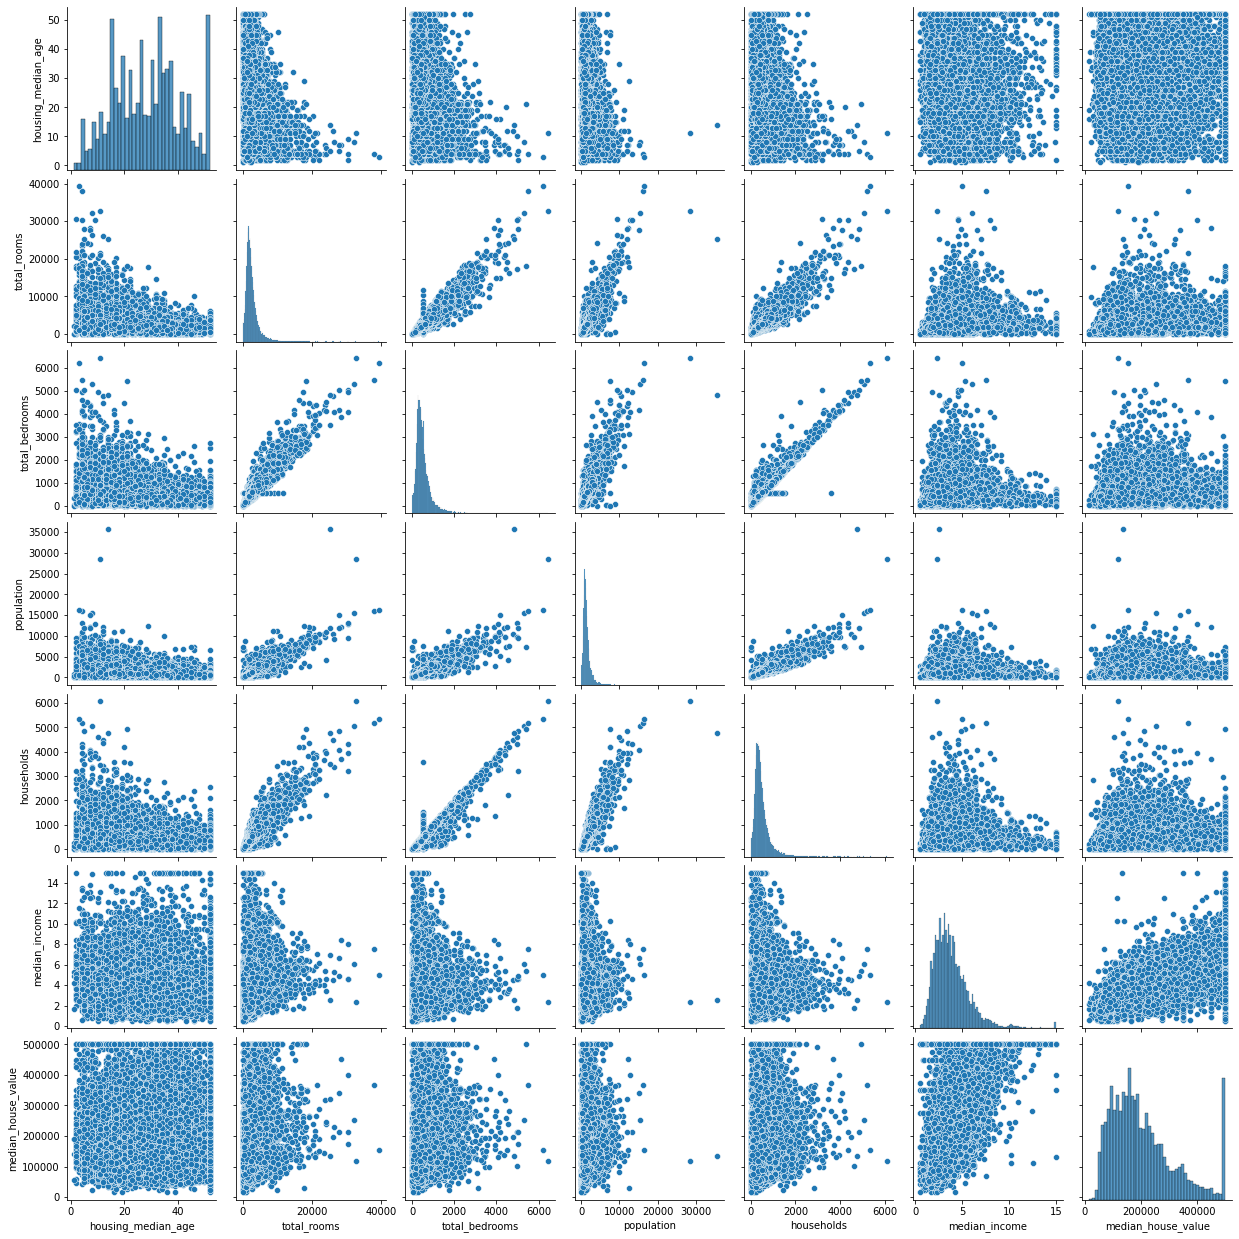

In [ ]:
sns.pairplot(df.iloc[:,2:9])

Feito isso, podemos ver que nenhum dos parâmetros varia linearmente com o preço das casas.

## 6 - Modelando dataset

Vamos adicionar algumas variáveis, assim teremos um modelo melhor:

In [ ]:
df['rooms_per_household']=df['total_rooms']/df['households']
df['bedrooms_per_room']=df['total_bedrooms']/df['total_rooms']
df['bedrooms_per_household']=df['total_bedrooms']/df['households']
df['household_per_population']=df['households']/df['population']
df['population_per_room']=df['population']/df['total_rooms']
df['population_per_bedroom']=df['population']/df['total_bedrooms']
df=df.drop(columns=['households'])
df=df.drop(columns=['total_bedrooms'])

In [ ]:
list(df.columns.values)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'population',
 'median_income',
 'median_house_value',
 'ocean_proximity',
 'rooms_per_household',
 'bedrooms_per_room',
 'bedrooms_per_household',
 'household_per_population',
 'population_per_room',
 'population_per_bedroom']

Vamos reorganizar a ordem dessas variáveis:

In [ ]:
df=df[['longitude','latitude',
 'housing_median_age',
 'total_rooms',
 'population',
 'median_income',
 'rooms_per_household',
 'bedrooms_per_room',
'bedrooms_per_household',
 'household_per_population',
'population_per_room',
'population_per_bedroom',
'ocean_proximity',
 'median_house_value'
 ]]

In [ ]:
df

,longitude,latitude,housing_median_age,total_rooms,population,median_income,rooms_per_household,bedrooms_per_room,bedrooms_per_household,household_per_population,population_per_room,population_per_bedroom,ocean_proximity,median_house_value
0,-122.23,37.88,41.0,880.0,322.0,8.3252,6.984127,0.146591,1.023810,0.391304,0.365909,2.496124,NEAR BAY,452600.0
1,-122.22,37.86,21.0,7099.0,2401.0,8.3014,6.238137,0.155797,0.971880,0.473969,0.338217,2.170886,NEAR BAY,358500.0
2,-122.24,37.85,52.0,1467.0,496.0,7.2574,8.288136,0.129516,1.073446,0.356855,0.338105,2.610526,NEAR BAY,352100.0
3,-122.25,37.85,52.0,1274.0,558.0,5.6431,5.817352,0.184458,1.073059,0.392473,0.437991,2.374468,NEAR BAY,341300.0
4,-122.25,37.85,52.0,1627.0,565.0,3.8462,6.281853,0.172096,1.081081,0.458407,0.347265,2.017857,NEAR BAY,342200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,845.0,1.5603,5.045455,0.224625,1.133333,0.390533,0.507508,2.259358,INLAND,78100.0
20636,-121.21,39.49,18.0,697.0,356.0,2.5568,6.114035,0.215208,1.315789,0.320225,0.510760,2.373333,INLAND,77100.0
20637,-121.22,39.43,17.0,2254.0,1007.0,1.7000,5.205543,0.215173,1.120092,0.429990,0.446761,2.076289,INLAND,92300.0
20638,-121.32,39.43,18.0,1860.0,741.0,1.8672,5.329513,0.219892,1.171920,0.470985,0.398387,1.811736,INLAND,84700.0


Como mencionado antes, precisamos codificar a variável *ocean_proximity*, por ser um dado categórico:

In [ ]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[12])],remainder='passthrough')

In [ ]:
X=np.array(ct.fit_transform(X))

Agora vamos dividir nosso banco de dados em **Set de treino** e **Set de Teste**:

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

Feito isso vamos dimensionar nossas variáveis:

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train[:,5:]=scaler.fit_transform(X_train[:,5:])
X_test[:,5:]=scaler.transform(X_test[:,5:])

Por fim vamos encaixar isso no **modelo random forest regressivo**:

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=50)
regressor.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Podemos agora fazer a previsão e compara-los

In [ ]:
y_pred=regressor.predict(X_test)
np.set_printoptions(precision=2)
compare=(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),axis=1))

In [ ]:
compare

array([[174545.98, 140100.  ],
       [166882.  , 163000.  ],
       [178936.  , 184700.  ],
       ...,
       [201220.  , 227200.  ],
       [171940.  , 178900.  ],
       [356656.  , 350500.  ]])

Neste array podemos ver os valores **PREVISTOS (ESQUERDA)** x **ORIGINAIS (DIREITA)**

Para ter uma noção maior da precisão desta previsão, vamos calcular a acuracia do modelo aplicado:

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8103370802584227

## 7 - Conclusão

Assim podemos concluir, que este projeto apresentou uma acurácia de 83%, tendo assim uma boa apresentação entre Valor Estimado x Valor Original.